In [15]:
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az
import matplotlib.pyplot as plt

# Introduction

cf. pymc tutorials https://www.pymc.io/projects/examples/en/latest/howto/api_quickstart.html#probability-distributions

# Explanation of the below code

This is an example of evaluation of A/B tests by bayesian methods.

Settings: we run 2-advertisement A/Btest and got the click data Xa and Xb.

Assume that
- 'click' generated by Bernoulli distribution with p=p_a (resp. p_b)
- p_a (resp. p_b) generated by Uniform distribution with lower=0, upper=1

In [26]:
seed = 100
rng = np.random.default_rng(seed)

Xa = rng.binomial(1, 0.8, 1000)
Xb = rng.binomial(1, 0.4, 1000)

np.sum(Xa==1), np.sum(Xa==0), np.sum(Xb==1), np.sum(Xb==0)

(794, 206, 384, 616)

In [31]:
# create probabilistic models
with pm.Model() as model:
    # set prior distributions
    p_a = pm.Uniform('$p_a$', lower=0., upper=1.)
    p_b = pm.Uniform('$p_b$', lower=0., upper=1)
    
    # create difference between prob. of group assigned treatmentA/B 
    # to trace during MCMC
    diff_a_and_b =  pm.Deterministic("$p_a - p_b$", p_a - p_b)
    
    # set likelihood
    obs_a = pm.Bernoulli('click_in_treatment_a', p=p_a, observed=Xa)
    obs_b = pm.Bernoulli('click_in_treatment_b', p=p_b, observed=Xb)
    
    trace = pm.sample(2000, chains=4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [$p_a$, $p_b$]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 14 seconds.


array([[<AxesSubplot:title={'center':'$p_a$'}>,
        <AxesSubplot:title={'center':'$p_a$'}>],
       [<AxesSubplot:title={'center':'$p_b$'}>,
        <AxesSubplot:title={'center':'$p_b$'}>],
       [<AxesSubplot:title={'center':'$p_a - p_b$'}>,
        <AxesSubplot:title={'center':'$p_a - p_b$'}>]], dtype=object)

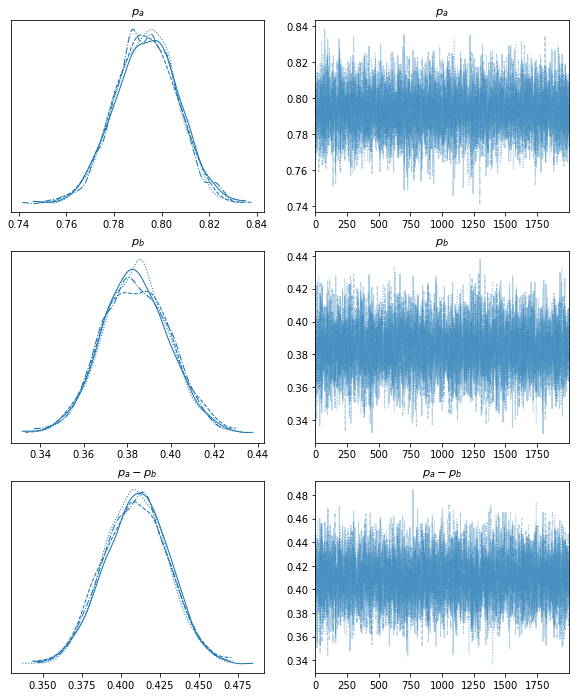

In [32]:
# diagnose MCMC
# if the num. of samples is not enoug, then the trace of sample path is not stable.
az.plot_trace(trace, figsize=(10, 12))

array([<AxesSubplot:title={'center':'$p_a$'}>,
       <AxesSubplot:title={'center':'$p_b$'}>,
       <AxesSubplot:title={'center':'$p_a - p_b$'}>], dtype=object)

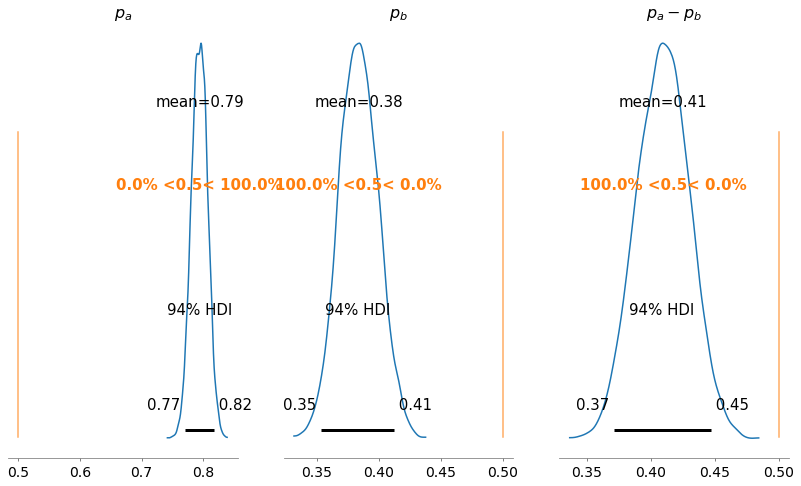

In [37]:
# XX%-HDI = highest density interval: this interval include mode of posterior distribution.
# And this interval means the following:
# it's probability is XX% that a true parameter is included in this interval.
az.plot_posterior(trace, ref_val=0.5, figsize=(14, 8))